In [1]:
import pandas as pd
import seaborn as sns
from openpyxl import Workbook
from openpyxl.chart import BarChart, Reference
from openpyxl.drawing.image import Image
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.utils import get_column_letter
from openpyxl.worksheet.table import Table, TableStyleInfo
from openpyxl.styles import PatternFill

In [2]:
# Read in the data 
complete_cases = pd.read_excel('data/complete_cases.xlsx')
complete_cases.head()

,email,cohort,pre,post,age,sex,education,satisfaction,study_hours
0,smehaffey0@creativecommons.org,4,485,494,32,Male,Bachelor's,2,36.6
1,kbridgnell5@webnode.com,1,484,503,32,Female,Bachelor's,6,32.2
2,abotham6@usda.gov,1,497,501,30,Female,Bachelor's,10,32.3
3,szeal7@pinterest.com,2,451,457,32,Male,Bachelor's,4,26.2
4,ikidby8@who.int,4,452,448,29,Female,Bachelor's,9,27.9


In [3]:
# Create a new workbook and select the worksheet
wb = Workbook()

# Assign the active worksheet to ws
ws = wb.active

In [4]:
ws['A1'] = "Average pre score"
ws['B1'] = round(complete_cases['pre'].mean(), 2)  # Round output to two decimals

ws['A2'] = "Average post score"
ws['B2'] = round(complete_cases['post'].mean(), 2)

In [5]:
ws.column_dimensions['A'].width = 16

In [6]:
# Create a bar chart object
chart = BarChart()

# Define the data range
data = Reference(ws, min_col=2, min_row=1, max_col=2, max_row=2)

In [7]:
# Add data to the chart
chart.add_data(data)

# Set chart title, axis labels
chart.title = "Score Comparison"
chart.x_axis.title = "Score Type"
chart.y_axis.title = "Score Value"

In [8]:
# Set category names
categories = Reference(ws, min_col=1, min_row=1, max_row=2)
chart.set_categories(categories)

# Remove the legend
chart.legend = None

In [9]:
# Add the chart to a specific location on the worksheet
ws.add_chart(chart, "D1")

C:\Users\GeorgeMount\Anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


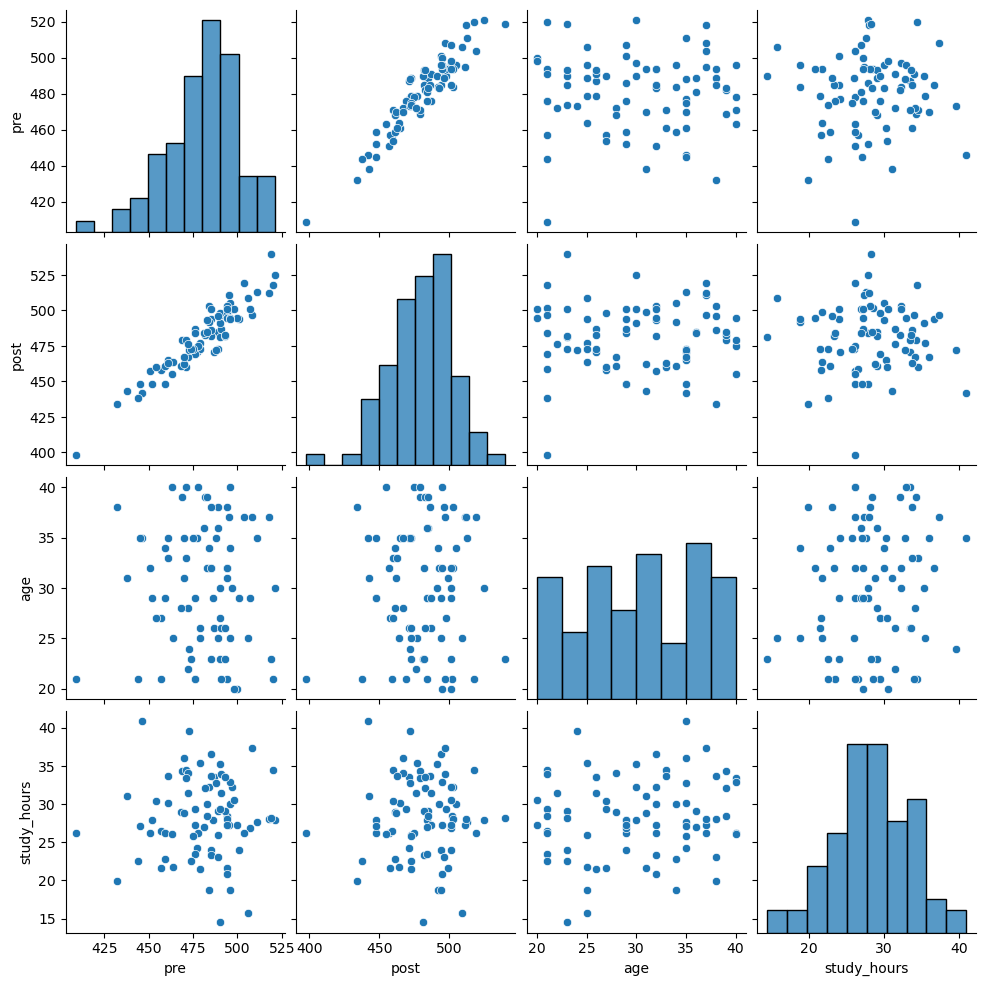

In [10]:
sns.pairplot(complete_cases[['pre', 'post', 'age', 'study_hours']])

C:\Users\GeorgeMount\Anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


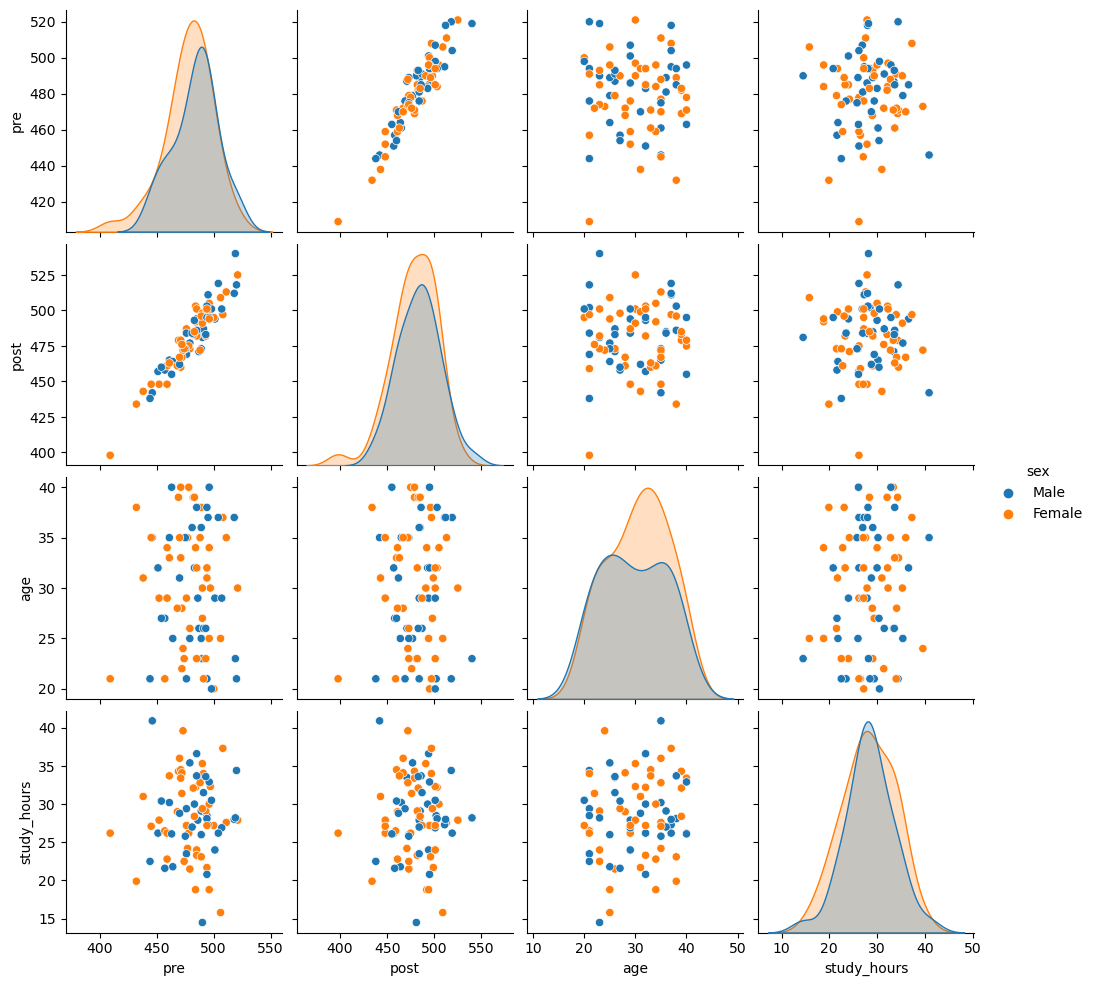

In [11]:
sns_plot = sns.pairplot(complete_cases[['pre', 'post', 'age', 'study_hours', 'sex']],
            hue='sex')

In [12]:
# Save pairplot to disk as an image
sns_plot.savefig('output/pairplot.png')

# Load saved image into the worksheet
image = Image('output/pairplot.png')
ws.add_image(image, 'A20')

In [13]:
wb.save('output/m_03_v_08_output.xlsx')